# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.079805e+01     6.725960e+00
 * time: 0.00507807731628418
     1     2.809272e+01     4.664934e+00
 * time: 0.015674114227294922
     2     2.159207e+01     7.396698e+00
 * time: 0.041667938232421875
     3     1.261285e+01     2.039420e+00
 * time: 0.07228708267211914
     4     1.143435e+01     1.883586e+00
 * time: 0.09116101264953613
     5     1.121357e+01     1.279520e+00
 * time: 0.1100001335144043
     6     1.034673e+01     1.196361e+00
 * time: 0.12891411781311035
     7     9.710315e+00     1.142012e+00
 * time: 0.1477649211883545
     8     9.428721e+00     7.249649e-01
 * time: 0.1666860580444336
     9     9.289445e+00     6.409608e-01
 * time: 0.18537592887878418
    10     9.203339e+00     4.872883e-01
 * time: 0.20380401611328125
    11     9.176491e+00     7.953359e-01
 * time: 0.21817398071289062
    12     9.122743e+00     5.045928e-01
 * time: 0.2328050136566162
    13     9.030882e+00     4.952657e-01
 * time: 0

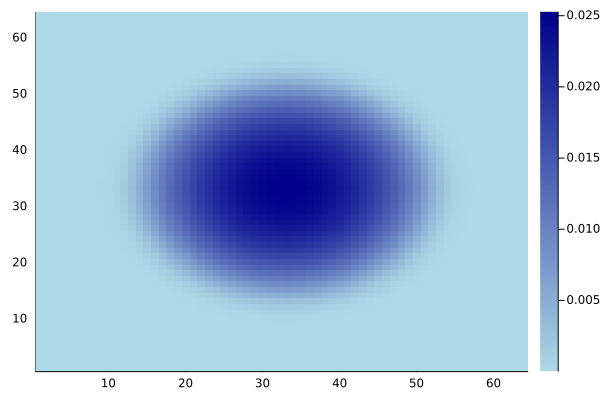

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)